In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [3]:
df = pd.read_csv('chicago-data-subset-test.csv')

# Explore Data

In [3]:
df.shape

(17373, 30)

In [4]:
df.columns

Index(['property_id', 'number_units', 'location', 'bed', 'bath', 'avg_price',
       'avg_sqft', 'min_sqft', 'min_price', 'max_sqft', 'max_price', 'id',
       'fips', 'street_address', 'city', 'st', 'zip', 'county', 'lat', 'lon',
       'type', 'year_built', 'number_units.1', 'name', 'created_by',
       'modified_on', 'census_tract', 'walkscore', 'property_indicator_id',
       'amenity_list'],
      dtype='object')

In [5]:
feature_to_use = ['number_units', 'bed', 'bath', 'avg_price',
       'avg_sqft', 'min_sqft', 'min_price', 'max_sqft', 'max_price', 
       'fips', 'street_address',  'zip', 'lat', 'lon',
       'type', 'census_tract', 'walkscore','property_indicator_id', 'amenity_list']
num_features = ['number_units', 'bed', 'bath', 'avg_price',
       'avg_sqft', 'min_sqft', 'min_price', 'max_sqft', 'max_price', 
        'lat', 'lon','walkscore']
cat_features = ['fips', 'street_address',  'zip','type', 'census_tract','property_indicator_id']

### Missing Values

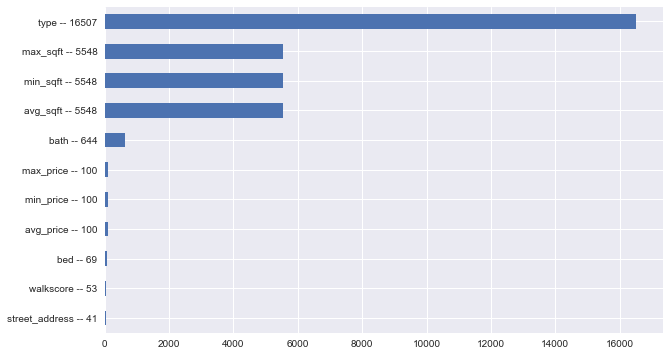

In [25]:
missing = df[feature_to_use].isnull().sum()
missing = missing[missing > 0]
na_counts = missing.sort_values()
ax = na_counts.plot.barh(figsize=(10,6))
_ = ax.set_yticklabels(na_counts.index.str[:]+' -- '+na_counts.astype(str).str[:]+'')

### Numeric Features

In [7]:
df[feature_to_use].head(5)

,number_units,bed,bath,avg_price,avg_sqft,min_sqft,min_price,max_sqft,max_price,fips,street_address,zip,lat,lon,type,census_tract,walkscore,property_indicator_id,amenity_list
0,17,0.0,1.0,845.0,433.0,399.0,750.0,450.0,1050.0,1.703100e+14,4242 N Sheridan Rd,60613,41.959588,-87.655222,NaN,1.703103e+10,89.0,22.0,"neighboorhood__has_near_public_transportation,..."
1,58,1.0,1.0,1119.0,665.0,381.0,825.0,1000.0,1655.0,1.703100e+14,4242 N Sheridan Rd,60613,41.959588,-87.655222,NaN,1.703103e+10,89.0,22.0,"neighboorhood__has_near_public_transportation,..."
2,2,1.0,1.5,1423.0,NaN,NaN,1395.0,NaN,1450.0,1.703100e+14,4242 N Sheridan Rd,60613,41.959588,-87.655222,NaN,1.703103e+10,89.0,22.0,"neighboorhood__has_near_public_transportation,..."
3,27,2.0,1.0,1452.0,1002.0,700.0,1025.0,1159.0,2475.0,1.703100e+14,4242 N Sheridan Rd,60613,41.959588,-87.655222,NaN,1.703103e+10,89.0,22.0,"neighboorhood__has_near_public_transportation,..."
4,1,2.0,1.5,1150.0,NaN,NaN,1150.0,NaN,1150.0,1.703100e+14,4242 N Sheridan Rd,60613,41.959588,-87.655222,NaN,1.703103e+10,89.0,22.0,"neighboorhood__has_near_public_transportation,..."


In [8]:
df.loc[:,['fips','zip','census_tract','property_indicator_id']] = df.loc[:,['fips','zip','census_tract','property_indicator_id']].astype('str')

In [9]:
df[num_features].describe()

,number_units,bed,bath,avg_price,avg_sqft,min_sqft,min_price,max_sqft,max_price,lat,lon,walkscore
count,17373.000000,17304.000000,16729.000000,17273.000000,11825.000000,11825.000000,17273.000000,11825.000000,17273.000000,17373.000000,17373.000000,17320.000000
mean,11.066425,2.005374,1.413294,1814.084814,829.809810,756.684567,1667.632027,897.447526,1999.608059,41.878835,-87.649420,85.668938
std,75.655351,1.177053,0.637787,1194.324499,689.108389,707.343826,1178.941569,719.084543,1476.140444,0.079839,0.047320,10.715943
min,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.634277,-87.906317,3.000000
25%,2.000000,1.000000,1.000000,1128.000000,200.000000,0.000000,1021.000000,360.000000,1165.000000,41.799848,-87.674178,79.000000
50%,3.000000,2.000000,1.000000,1550.000000,800.000000,750.000000,1450.000000,900.000000,1624.000000,41.896806,-87.648003,89.000000
75%,8.000000,3.000000,2.000000,2200.000000,1200.000000,1200.000000,2075.000000,1250.000000,2400.000000,41.940781,-87.617829,94.000000
max,6018.000000,10.000000,11.000000,24000.000000,5000.000000,5000.000000,24000.000000,5000.000000,27222.000000,42.022751,-87.527303,100.000000


In [10]:
df.amenity_list[0]

'neighboorhood__has_near_public_transportation,unit__has_deck,unit__has_hardwood_floors,building__has_lobby,building__has_extra_storage,building__has_fitness_center,building__has_package_receiving,building__has_on_site_management,building__has_new_construction,unit__has_all_appliances_included,unit__has_balcony_or_patio,building__has_courtyard,neighboorhood__has_grocery_store,unit__has_recently_renovated,unit__has_ceiling_fan,unit__has_dining_room,unit__has_granite_countertops,building__has_online_payment_portal,building__has_laundry_room,building__has_bike_storage,unit__has_stainless_steel_appliances,unit__has_fireplace,unit__has_high_ceilings,unit__has_living_room,building__has_pets_allowed,neighboorhood__has_quiet_neigborhood,building__has_tennis_court,unit__has_ceramic_tile_flooring,building__has_pet_park,unit__has_in_unit_laundry,unit__has_all_utilities_included,unit__has_central_air_conditioning,unit__has_view,unit__has_walk_in_closet,building__has_parking_garage'

#### Bedrooms Bathrooms

In [11]:
print(df.bed.unique().size,'different bedroom number')
print(df.bath.unique().size,'different bathroom number')

11 different bedroom number
15 different bathroom number


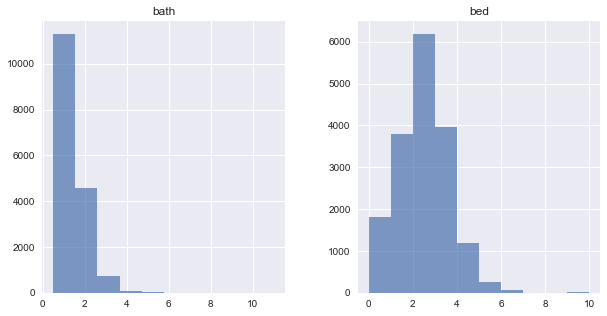

In [6]:
_ = df[['bath','bed']].hist(alpha=0.7,figsize=(10,5))

#### Prices

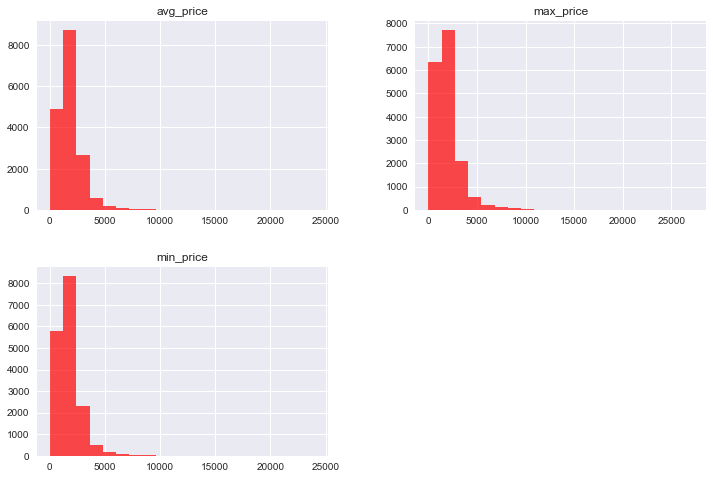

In [5]:
_ = df[['min_price','avg_price','max_price']].hist(bins=20,alpha=0.7,color='red',figsize=(12,8))

#### sqft

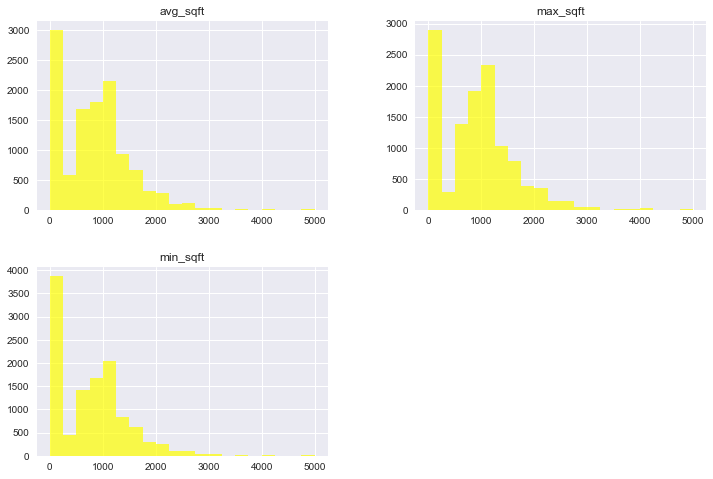

In [4]:
_ = df[['min_sqft','avg_sqft','max_sqft']].hist(bins=20,alpha=0.7,color='yellow',figsize=(12,8))

#### Longitude and Latitude

The darkness of blue indicates the density of available properties in areas

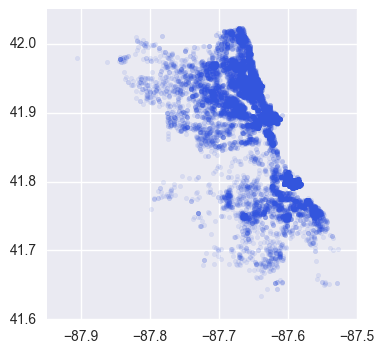

In [98]:
plt.scatter(df.lon,df.lat,alpha=0.1,color='#3355dd',s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

#### Walkscore

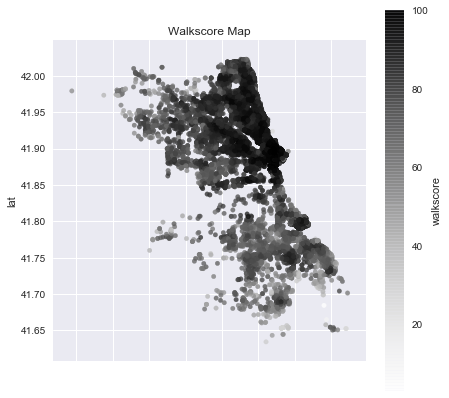

In [31]:
df.plot.scatter('lon','lat',c='walkscore',title='Walkscore Map',alpha=0.8,figsize=(7,7))
plt.gca().set_aspect('equal', adjustable='box')

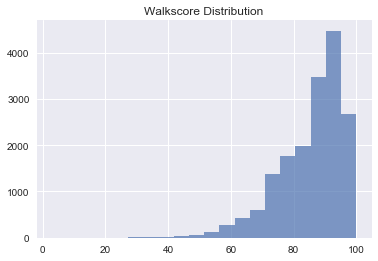

In [7]:
df.walkscore.hist(alpha=0.7,bins=20)
_ = plt.title('Walkscore Distribution')

### Categorical Features

In [115]:
df[cat_features].describe(include=['O'])

,fips,street_address,zip,type,census_tract,property_indicator_id
count,17373,17332,17373,866,17373,17373
unique,11,10309,63,3,747,14
top,1.70311e+14,500 N Lake Shore Dr,60615,house,17031081800.0,22.0
freq,4781,40,1652,670,284,7309


#### Fips

11 unique fips


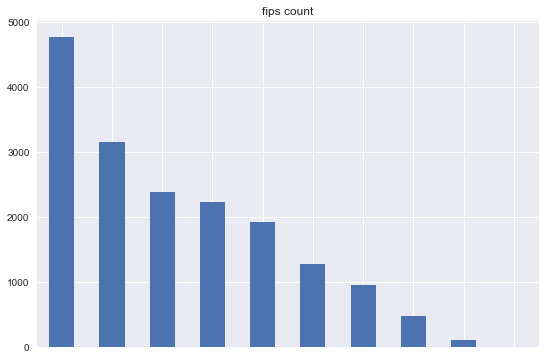

In [6]:
print(df.fips.unique().size,'unique fips')
plt.figure(figsize=(9,6))
df.fips.value_counts().plot.bar()
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off') 
_ = plt.title('fips count')

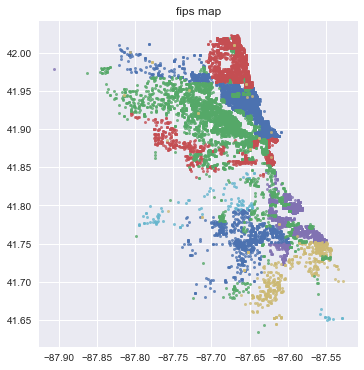

In [78]:
groups = df.groupby('fips')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.lon, group.lat, marker='o', linestyle='', ms=3, label=name,alpha=0.8)
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.title('fips map')

#### Zip codes

63 unique zips


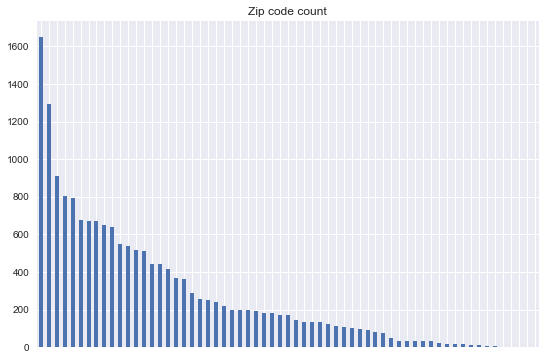

In [7]:
print(df.zip.unique().size,'unique zips')
plt.figure(figsize=(9,6))
df.zip.value_counts().plot.bar()
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off') 
_ = plt.title('Zip code count')

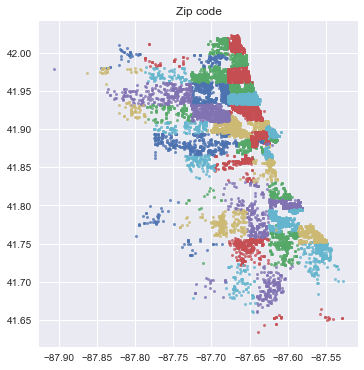

In [80]:
groups = df.groupby('zip')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.lon, group.lat, marker='o', linestyle='', ms=3, label=name,alpha=0.8)
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.title('Zip code')

#### Census tract

747 unique census tract


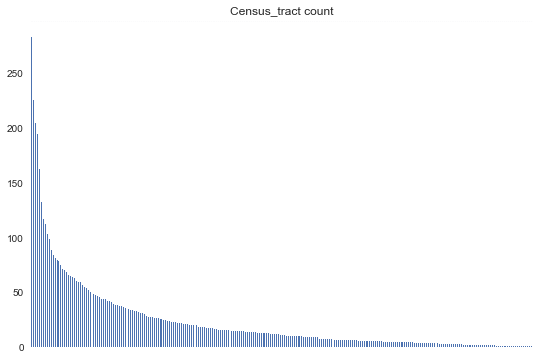

In [8]:
#Explore the census_tract code
print(df.census_tract.unique().size,'unique census tract')
plt.figure(figsize=(9,6))
df.census_tract.value_counts().plot.bar()
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off') 
_ = plt.title('Census_tract count')

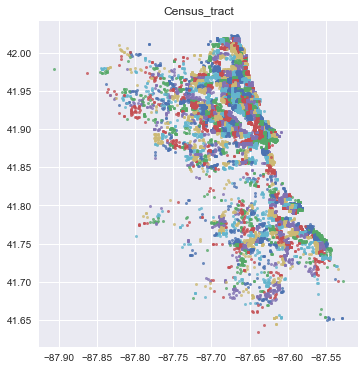

In [81]:
groups = df.groupby('census_tract')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for name, group in groups:
    ax.plot(group.lon, group.lat, marker='o', linestyle='', ms=3, label=name,alpha=0.8)
plt.gca().set_aspect('equal', adjustable='box')
_ = plt.title('Census_tract')

##### Property_id, street_address and location are similar features

In [38]:
print(df.property_id.unique().size,'unique properties')
df.property_id.value_counts().head(10)

10341 unique properties


929e3634-4da7-45ff-b9db-8d5fef345d1f    40
0fb53238-0fe0-4819-b9ec-444e17938b2e    28
5269a215-739c-48fc-a82c-f2fff185d7b1    27
ae8329e5-7388-4785-a3e7-9becc1bbdacd    26
026854dc-4011-4666-b6d6-29cea9c9b2f2    22
4e5d617f-38d9-4187-92b8-050444989358    22
250319f9-9951-446e-b800-a32770fd02a7    22
91f3b513-d34e-44db-8330-e683aca8fbfd    22
f2ecdb8b-e1a1-476b-8d14-10d25a52af29    21
55e2bcb2-f3a2-4802-8cf8-4a4c5f0c8670    21
Name: property_id, dtype: int64

In [40]:
print(df.street_address.unique().size,'unique addresses')
df.street_address.value_counts().head(10)

10310 unique addresses


500 N Lake Shore Dr      40
111 W Maple St           28
56 E 56th St             27
5111 S Kimbark Ave       26
4726 S Woodlawn Ave      22
4850 S Drexel Blvd       22
5244 S Ingleside Ave     22
4659 S Drexel Blvd       22
4721 S Ellis Ave         22
5468 S Hyde Park Blvd    21
Name: street_address, dtype: int64

In [39]:
print(df.location.unique().size,'unique locations')
df.location.value_counts().head(10)

10240 unique locations


0101000020E6100000F11E566E58E755C0048F6FEF1AF24440    40
0101000020E6100000625FFC7E7BE755C0F14D2E217AF14440    30
0101000020E61000006E2B627DA8E655C0CA9C7818A4E64440    28
0101000020E6100000C05B204171E855C0955A947E67F34440    28
0101000020E610000005381845EAE755C04FC0C0BD7CE54440    27
0101000020E61000001DC7B4DBD3E855C059E02BBAF5F24440    26
0101000020E610000040BE840A0EE655C0CA54C1A8A4E64440    26
0101000020E610000005813A8A98E655C0E5B8533A58E64440    22
0101000020E6100000A3E5400FB5E655C059A5F44C2FE74440    22
0101000020E610000016855D143DE655C0E7FC14C781E74440    22
Name: location, dtype: int64

##### Distribution of different property types

In [12]:
property_idicator = pd.read_csv('property_indicator_key.csv',index_col='id')

14 unique property types


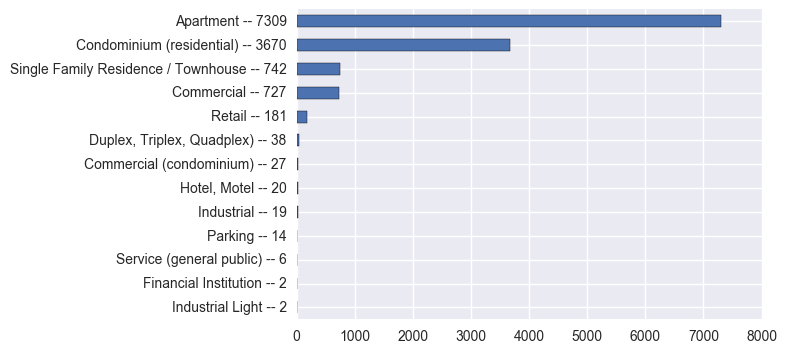

In [52]:
print(df.property_indicator_id.unique().size,'unique property types')
counts = df.property_indicator_id.astype(float).map(property_idicator.type).value_counts()[::-1]
ax = counts.plot.barh()
_ = ax.set_yticklabels(counts.index.str[:]+' -- '+counts.astype(str).str[:])

##### We can figure out that one zipcode appears in different fips. The relationship between them is not superset and subset.

In [35]:
pd.crosstab(df.zip,df.fips).head(10)

fips,1.70311e+14,1.70312e+14,1.70313e+14,1.70314e+14,1.70315e+14,1.70316e+14,1.70317e+14,1.70318e+14,1.7031e+14,1.7032e+14,nan
zip,,,,,,,,,,,
60067,4,0,0,0,0,0,0,0,0,0,0
60601,0,0,215,0,0,0,0,36,0,0,0
60602,0,0,11,0,0,0,0,9,0,0,0
60603,0,0,5,0,0,0,0,3,0,0,0
60604,0,0,3,0,0,0,0,5,0,0,0
60605,0,0,207,0,0,0,0,209,0,0,1
60606,0,0,13,0,0,0,0,20,0,0,0
60607,0,0,14,0,0,0,0,227,0,0,2
60608,0,0,108,0,0,7,0,67,0,0,0


### Create new features

In [23]:
df['rooms'] = df.bed + df.bath
df['num_features'] = df.amenity_list.apply(lambda x:len(x.split(',')))
df['num_unit_features'] = df.amenity_list.apply(lambda x:len([feature for feature in x.split(',') if feature.startswith('unit')]))
df['num_building_features'] = df.amenity_list.apply(lambda x:len([feature for feature in x.split(',') if feature.startswith('building')]))
df['num_neighborhood_features'] = df.amenity_list.apply(lambda x:len([feature for feature in x.split(',') if feature.startswith('neighboorhood')]))

In [24]:
#We assume that the city center is the Millennium Park, then we calculate the distances from properties to the Millennium Park
mill_park = [41.882547, -87.622274]
df['manhattan_dist'] = (df.lat - mill_park[0]).abs() + (df.lon - mill_park[1]).abs()
df['euclidean_dist'] = np.sqrt(((df.lat - mill_park[0]) ** 2) + ((df.lon - mill_park[1]) ** 2))

In [56]:
df[['num_features','num_unit_features','num_building_features','num_neighborhood_features','manhattan_dist','euclidean_dist']].describe()

,num_features,num_unit_features,num_building_features,num_neighborhood_features,manhattan_dist,euclidean_dist
count,17373.00000,17373.000000,17373.000000,17373.000000,17373.000000,17373.000000
mean,15.59581,8.302481,6.690151,0.603177,0.108806,0.085259
std,19.38144,8.647055,10.433426,0.840569,0.058018,0.045767
min,1.00000,0.000000,0.000000,0.000000,0.002385,0.001988
25%,4.00000,3.000000,1.000000,0.000000,0.069700,0.053920
50%,8.00000,5.000000,2.000000,0.000000,0.109731,0.086654
75%,16.00000,10.000000,7.000000,1.000000,0.149864,0.118914
max,81.00000,34.000000,43.000000,4.000000,0.380684,0.300033


## Explore the relationships between price and other features

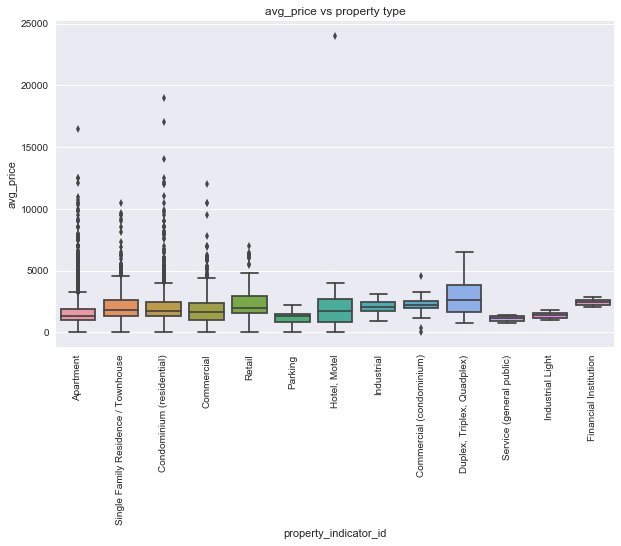

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.property_indicator_id.astype(float).map(property_idicator.type),y=df.avg_price)
plt.title('avg_price vs property type')
x=plt.xticks(rotation=90)

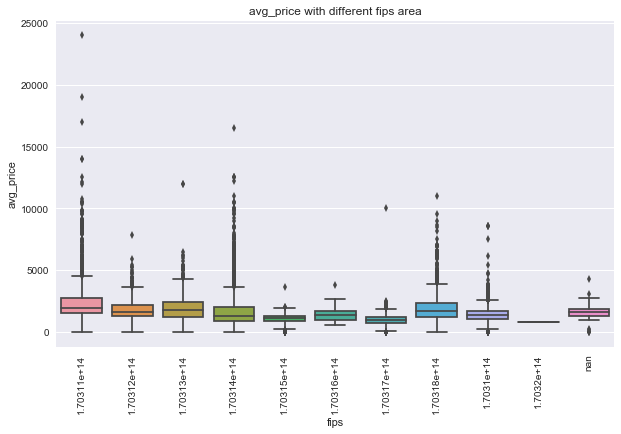

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.fips,y=df.avg_price)
plt.title('avg_price with different fips area')
x=plt.xticks(rotation=90)

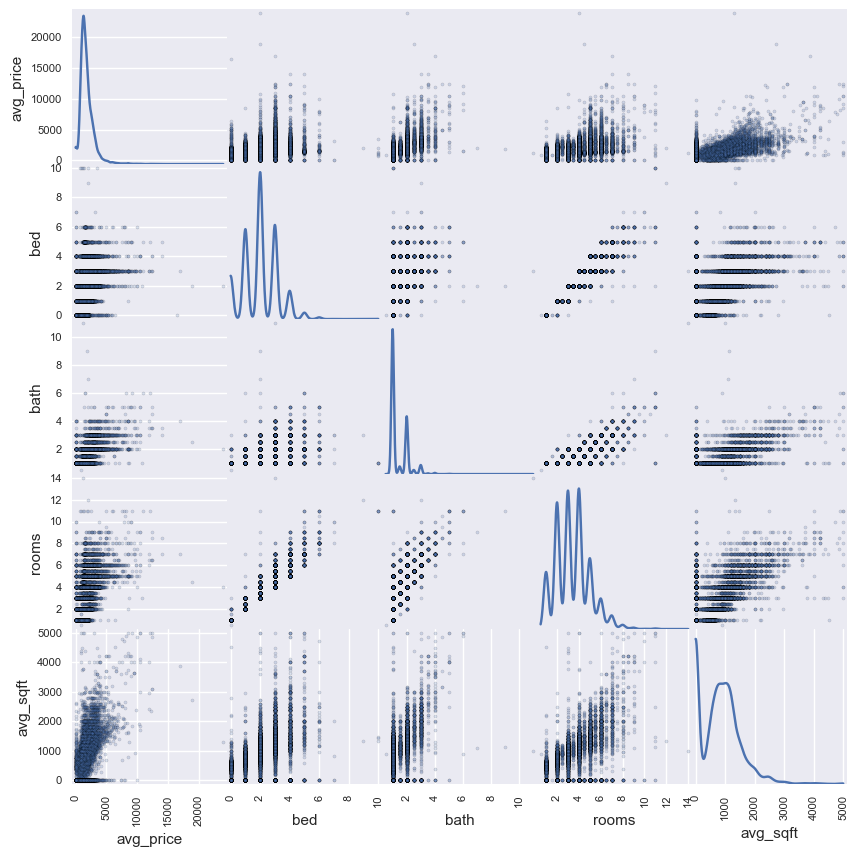

In [5]:
_ = scatter_matrix(df[['avg_price','bed','bath','rooms','avg_sqft']], alpha=0.2, figsize=(10, 10), diagonal='kde')

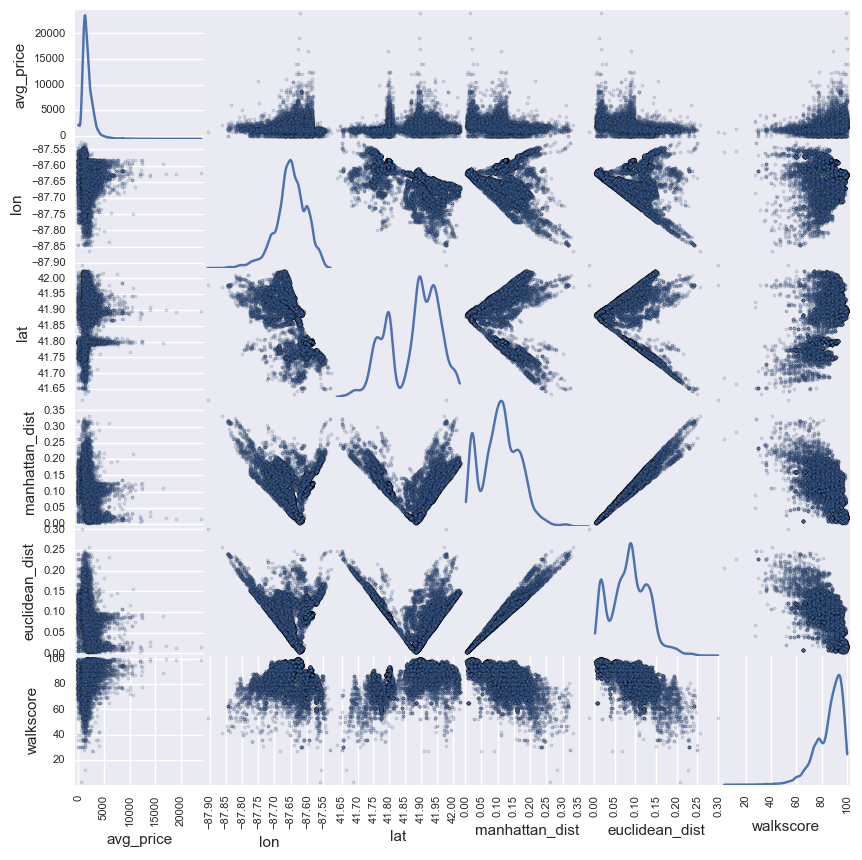

In [57]:
_ = scatter_matrix(df[['avg_price','lon','lat','manhattan_dist','euclidean_dist','walkscore']], alpha=0.2, figsize=(10, 10), diagonal='kde')

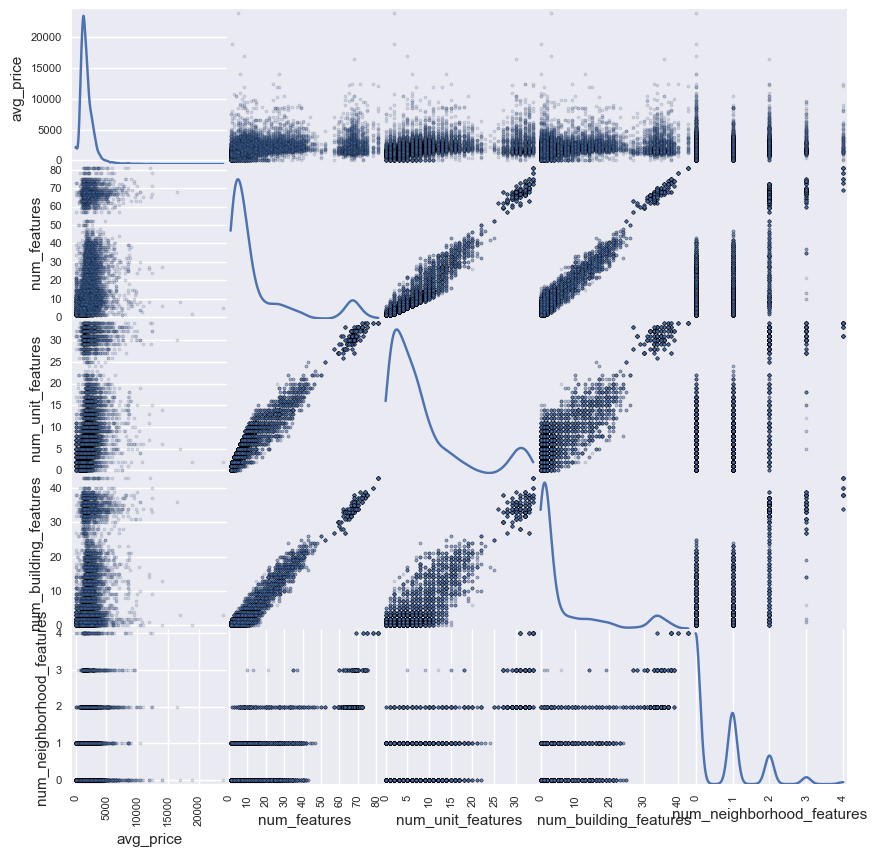

In [7]:
_ = scatter_matrix(df[['avg_price','num_features','num_unit_features','num_building_features','num_neighborhood_features']], alpha=0.2, figsize=(10, 10), diagonal='kde')

#### Before predicting the range, I plan to predict the average price at first. At the begining, in order to ensure prediction performance, I decide not to use samples with missing values.

In [8]:
no_na = df.dropna(subset=['bed','bath','avg_price','avg_sqft','walkscore','census_tract','lat','lon'],how='any')

#### Since the price is the target variable, I have to remove samples with 0 avg_price. Besides, there are some aparments with min_price of 0 but a correct number of max_price. Hence their avg_price is not accurate. We will exclude them as well.

In [9]:
no_na = no_na[(no_na.avg_price!=0)&(no_na.min_price!=0)]

#### Since room size is a significant feature to predict price range. I will also remove samples with 0 avg_sqft and 0 min_sqft.

In [10]:
no_na = no_na[(no_na.avg_sqft!=0)&(no_na.min_sqft!=0)]

In [28]:
no_na.shape

(7111, 37)

The price feature is highly skewed to the right. Hence I need to do the log transformation

In [14]:
no_na['log_price'] = np.log(no_na.avg_price)

### After log normalization, we can find some linear relationships

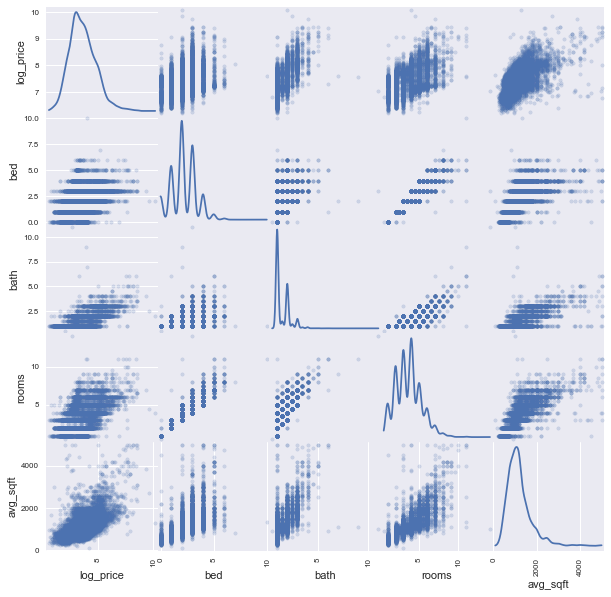

In [51]:
_ = scatter_matrix(no_na[['log_price','bed','bath','rooms','avg_sqft']], alpha=0.2, figsize=(10, 10), diagonal='kde')

#### In common sense, the sqft determines the property price. Therefore, let's take a look of how other features influence price per sqft.

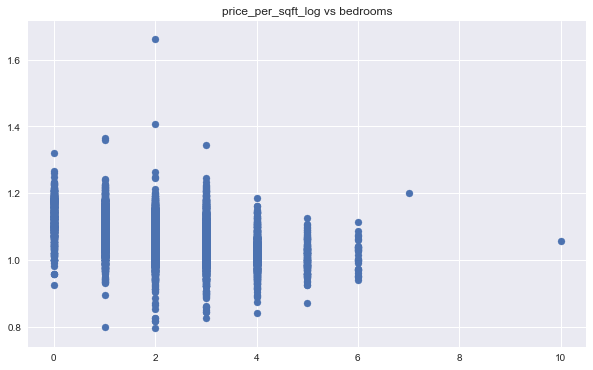

In [15]:
plt.figure(figsize=(10, 6))
no_na['log_avg_sqft'] = np.log(no_na.avg_sqft)
no_na['log_price_per_sqft'] = no_na.log_price / no_na.log_avg_sqft
plt.scatter(no_na.bed,no_na.log_price_per_sqft)
_ = plt.title('price_per_sqft_log vs bedrooms')

#### We can figure out that the distance to the loop area and Michigan Lake affects log_price_per_bedroom. Therefore, the features of lat and lon need some transformation.

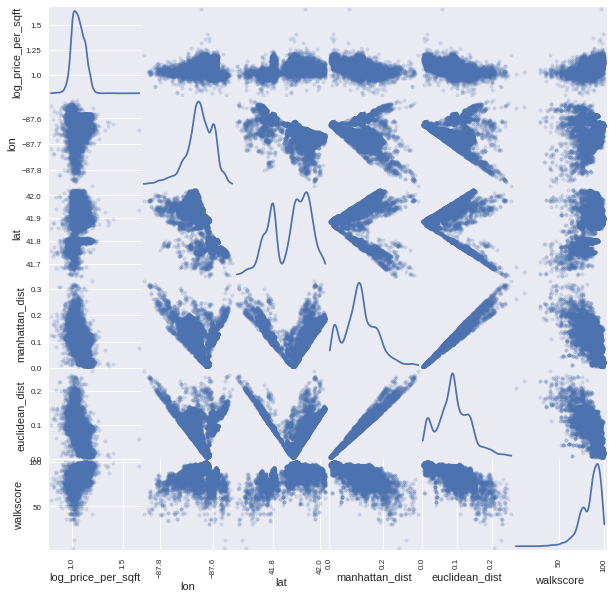

In [25]:
_ = scatter_matrix(no_na[['log_price_per_sqft','lon','lat','manhattan_dist','euclidean_dist','walkscore']], alpha=0.2, figsize=(10, 10), diagonal='kde')

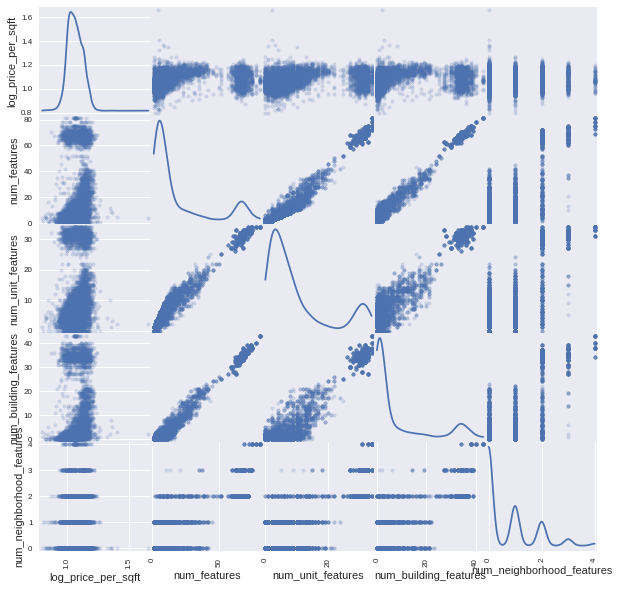

In [26]:
_ = scatter_matrix(no_na[['log_price_per_sqft','num_features','num_unit_features','num_building_features','num_neighborhood_features']], alpha=0.2, figsize=(10, 10), diagonal='kde')

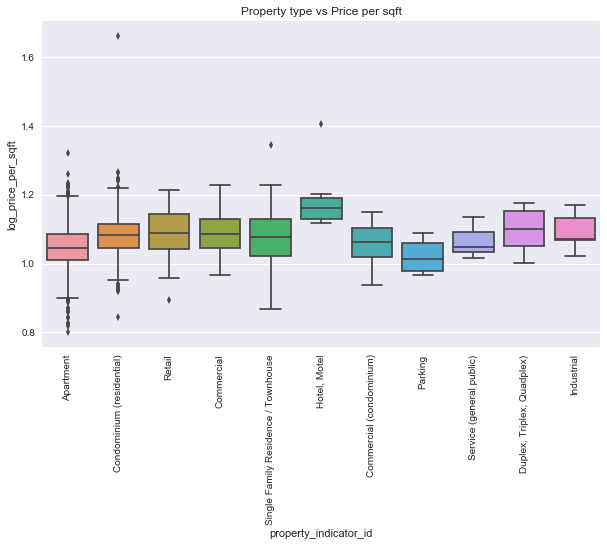

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_na.property_indicator_id.astype(float).map(property_idicator.type),y=no_na.log_price_per_sqft)
x=plt.xticks(rotation=90)
_ = plt.title('Property type vs Price per sqft')

# Build Models

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import r2_score

In [10]:
from sklearn.linear_model import LinearRegression, LassoCV,Lasso, RidgeCV,Ridge, ElasticNetCV,ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
feature_to_fit = [ 'bed', 'bath','log_avg_sqft','rooms',
                  'walkscore','num_features',
                  'num_unit_features','num_building_features','num_neighborhood_features',
                  'manhattan_dist','euclidean_dist','lat','lon']

In [31]:
X = MinMaxScaler().fit_transform(no_na[feature_to_fit])
y = no_na.log_price

### The baseline R square score:

Linear Rgression

In [32]:
prediction = cross_val_predict(LinearRegression(),X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Linear Regression:',r2_score(y_true=y,y_pred=prediction))

('Linear Regression:', 0.68508648835078012)


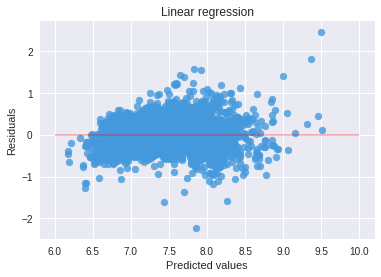

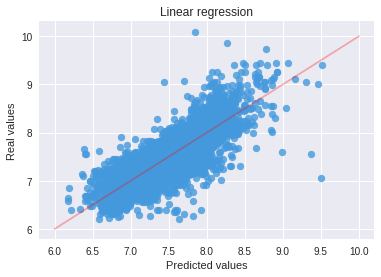

In [33]:
plt.scatter(prediction,prediction-y,alpha=0.8,color='#4499dd')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 6, xmax = 10, color = "red",alpha=0.3)
plt.show()

plt.scatter(prediction,y,alpha=0.8,color='#4499dd')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([6, 10], [6, 10], c = "red",alpha=0.3)

## We definitely want to improve the regression performance. Let's add more features.

#### Before that, we'd better take a look of the Price Corrleation Matrix

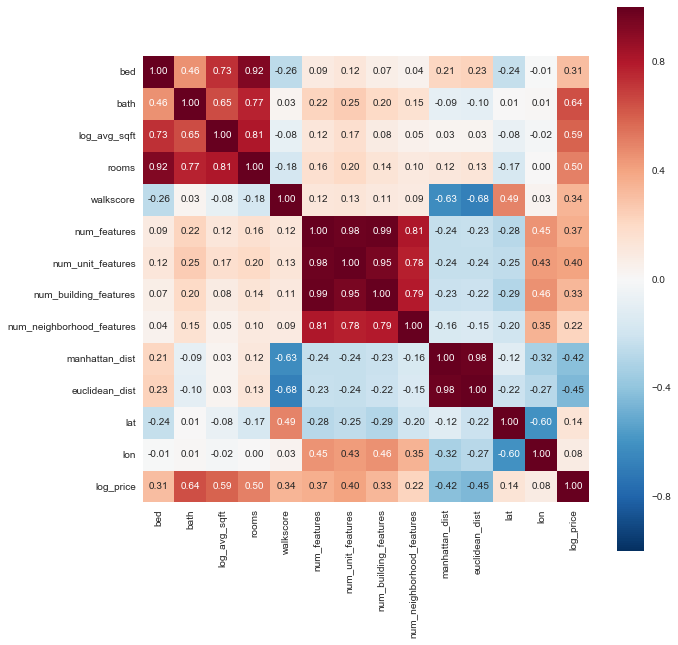

In [61]:
plt.figure(figsize=(10, 10))
corrs = no_na[feature_to_fit+['log_price']].corr()
sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

#### From the heatmap above, we can figure out that latitude and longitude have limit correlation with price.

#### As I mentioned before, the distance between properties and Michigan Lake influences their prices. However, since the lake shore doesn't perfectly conform to the direction of South to North, the feature of longitude doesn't explain this distance very accurately. Therefore, I'm gonna create a new feature from ltitude and longitude to pinpoint this distance.

In [1]:
#Firstlt, I use a starightline to determine the lake shore.
#latitude = longitude * slop + intercept
#longitude * slop - latitude + intercept = 0
#distance = |longitude * slop - latitude + intercept|
north = [42.022936, -87.665415]
south = [41.790262, -87.579714]
slop = (north[0]-south[0])/(north[1]-south[1])
intercept = north[0] - north[1] * slop

In [84]:
no_na['dist_to_ML'] = np.abs(no_na[['lat','lon']].apply(lambda x:-(x[1] * slop - x[0] + intercept),axis=1))

The distance is not as same as longitude

In [85]:
no_na[['dist_to_ML','lon']].corr()

,dist_to_ML,lon
dist_to_ML,1.000000,-0.785038
lon,-0.785038,1.000000


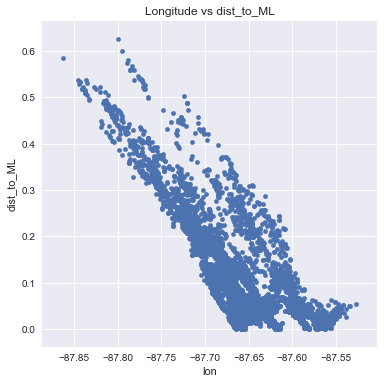

In [164]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
no_na.plot.scatter('lon','dist_to_ML',ax=ax)
_ = plt.title('Longitude vs dist_to_ML')

#### We all know that rental prices in the southern Chicago are lower than those in northern Chicago. Hence, property prices drop faster in south than in north with the same increasing distance to the downtown. To make the linear relationship more accurate, we should set a coefficient to re-scale the distance.

In [155]:
#Use the latitude of Millennium Park as the latitude of downtown Chicago
dist_to_dt = no_na.lat - mill_park[0]
no_na['dist_to_loop'] = np.where(dist_to_dt>0,dist_to_dt,-dist_to_dt*1.2)

After some attemptation, a coefficient of 1.2 gives a highest correlation with log_price_per_sqft

In [156]:
no_na[['dist_to_loop','log_price_per_sqft']].corr()

,dist_to_loop,log_price_per_sqft
dist_to_loop,1.000000,-0.441704
log_price_per_sqft,-0.441704,1.000000


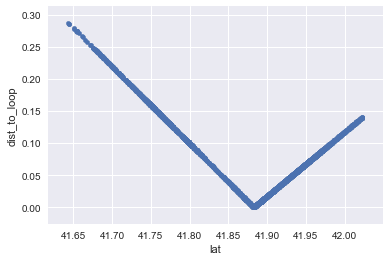

In [159]:
no_na.plot.scatter('lat','dist_to_loop')

From the correlation heat map, we can find out that after transformation, the linear relationships of longitude and latitude on price increased.

lon(0.08) -> dist_to_ML(-0.22);            lat(0.14) -> dist_to_loop(-0.4)

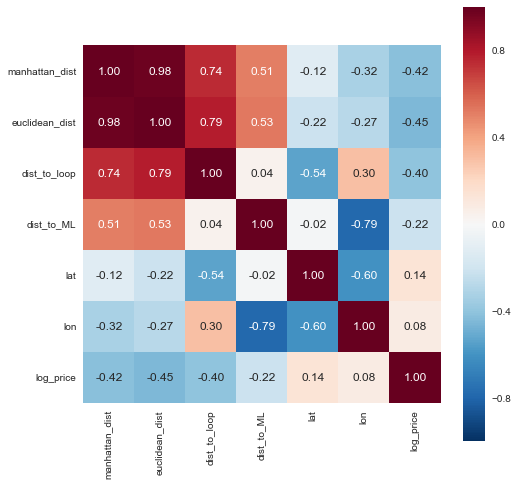

In [163]:
plt.figure(figsize=(8, 8))
corrs = no_na[['manhattan_dist','euclidean_dist','dist_to_loop','dist_to_ML','lat','lon','log_price']].corr()
sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})

#### Let's include property types in the linear regression

In [120]:
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['property_indicator_id']].astype(str))],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.68563105116613809

#### Then, let's add amenity features

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
amenity = no_na.amenity_list.apply(lambda x:x.replace(',',' '))
vectorizer = CountVectorizer(binary=True)
amenity_dummy = vectorizer.fit_transform(amenity)
amenity_names = pd.DataFrame([x for x in vectorizer.vocabulary_.items()]).set_index(1).sort_index()[0].tolist()
amenity_dummy = pd.DataFrame(amenity_dummy.toarray(),columns=amenity_names,index=no_na.index)

In [39]:
amenity_dummy.head()

,building__has_accepts_section_8,building__has_barbeque_grills,building__has_basketball_court,building__has_bike_storage,building__has_club_house,building__has_community_garden,building__has_community_room,building__has_computer_lab,building__has_concierge,building__has_conference_room,...,unit__has_living_room,unit__has_open_floor_plan,unit__has_penthouse_unit,unit__has_quartz_countertops,unit__has_recently_renovated,unit__has_stainless_steel_appliances,unit__has_vaulted_ceilings,unit__has_view,unit__has_walk_in_closet,unit__has_yard
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
5,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['property_indicator_id']].astype(str))
                   ,amenity_dummy],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.70261964345765404

### Then, let's start with area features.

#### Firstly add dummy variables of fips

In [77]:
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str))
                   ,amenity_dummy],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.71557330562952948

#### After including dummy variables of zip code, the r2 score was destroyed.

In [78]:
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id','zip']].astype(str))
                   ,amenity_dummy],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

-3391486263449090.0

##### To solve this problem, firstly let's try to use only 50% most frequent zip codes in the data set.

In [21]:
kept_zip = no_na.zip.value_counts().index[:32]
zip_code = pd.get_dummies(no_na.zip)[kept_zip]
zip_code.head()

,60615,60657,60614,60637,60613,60640,60647,60618,60611,60625,...,60616,60607,60608,60601,60645,60653,60661,60612,60621,60628
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.73780133615384669

##### How about 80%? The improvement is small, let's stop here.

In [80]:
kept_zip = no_na.zip.value_counts().index[:50]
zip_code = pd.get_dummies(no_na.zip)[kept_zip]
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.73802700552716005

#### Census_tract splits Chicago into small areas. Let's start with few high frequency areas at first.

##### The 50 most frequent census_tract

In [84]:
kept_ct = no_na.census_tract.value_counts().index[:50]
ct = pd.get_dummies(no_na.census_tract)[kept_ct]
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.73946230219540765

##### The 200 most frequent census_tract

In [85]:
kept_ct = no_na.census_tract.value_counts().index[:200]
ct = pd.get_dummies(no_na.census_tract)[kept_ct]
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
cross_val_score(LinearRegression(),new_X,y,scoring='r2',
                cv=KFold(10,shuffle=True,random_state=666)).mean()

0.74051531943101578

##### The 220 most frequent census_tract

In [86]:
kept_ct = no_na.census_tract.value_counts().index[:220]
ct = pd.get_dummies(no_na.census_tract)[kept_ct]
new_X = pd.concat([no_na[feature_to_fit+['dist_to_loop','dist_to_ML']],
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct],axis=1)
new_X = MinMaxScaler().fit_transform(new_X)
prediction = cross_val_predict(LinearRegression(),new_X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Linear Regression:',r2_score(y_true=y,y_pred=prediction))

('Linear Regression:', 0.74178027462439666)


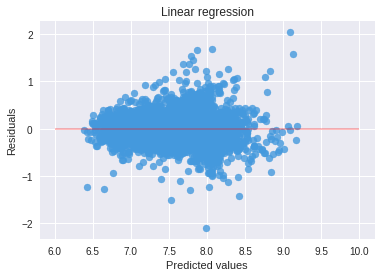

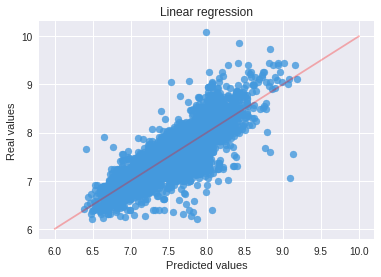

In [87]:
plt.scatter(prediction,prediction-y,alpha=0.8,color='#4499dd')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 6, xmax = 10, color = "red",alpha=0.3)
plt.show()

plt.scatter(prediction,y,alpha=0.8,color='#4499dd')
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([6, 10], [6, 10], c = "red",alpha=0.3)

##### After the 220 most frequent census_tract, the r2 score will drop if we add more dummy variables. Let's take a look of where do the rest 527 cens_tract locate.

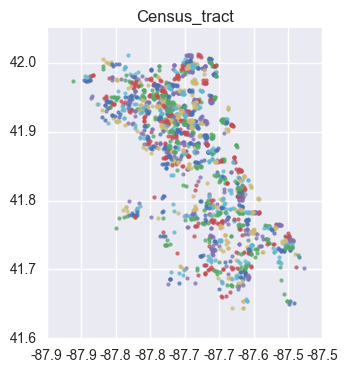

In [57]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
useless_census = no_na[ct.sum(axis=1)==0]
groups = useless_census.groupby('census_tract')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.lon, group.lat, marker='o', linestyle='', ms=3, label=name,alpha=0.8)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect('equal', adjustable='box')
_ = plt.title('Census_tract')

We cannot find any obvious pattern from the map. Therefore we will leave those useless census_tract out.

### Then, I will create polynominal terms from numeric variables

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [88]:
poly_features = poly.fit_transform(MinMaxScaler().fit_transform(no_na[feature_to_fit+['dist_to_loop','dist_to_ML']]))
print('Polynomial Feature #:',poly_features.shape[1])
new_X = np.hstack([poly_features,
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct])

('Polynomial Feature #:', 816)


#### So far we have 1199 features to feed the model.

In [21]:
new_X.shape

(7111, 1199)

#### Firstly, let's apply linear regression on all 1199 features

In [89]:
prediction = cross_val_predict(LinearRegression(),new_X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Linear Regression:',r2_score(y_true=y,y_pred=prediction))

('Linear Regression:', -12048197183.134638)


##### The linear regression is totally overfitted. Let's try Ridge Regresion to apply L2 regularization. Firstly we need to find out the best regularization coefficient alpha.

In [90]:
RidgeCV(alphas=[0.0001,0.001,0.01,0.05,0.1,0.2,0.5]).fit(new_X,y).alpha_

0.001

##### Reduce the testing range

In [92]:
RidgeCV(alphas=np.array(range(50,300,5),dtype=float)/100000).fit(new_X,y).alpha_

0.0025999999999999999

#### Ridge Regresion's preformance is pretty good

In [93]:
prediction = cross_val_predict(Ridge(alpha=0.0026,max_iter=10000),new_X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Ridge Regression:',r2_score(y_true=y,y_pred=prediction))

('Ridge Regression:', 0.81551768571968819)


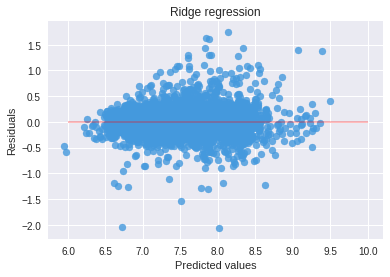

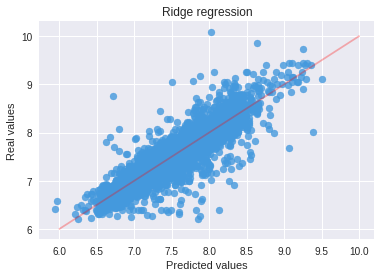

In [94]:
plt.scatter(prediction,prediction-y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 6, xmax = 10, color = "red",alpha=0.3)
plt.show()

plt.scatter(prediction,y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([6, 10], [6, 10], c = "red",alpha=0.3)

#### According to PCA, the first 100 features explained more than 95% of the variance.

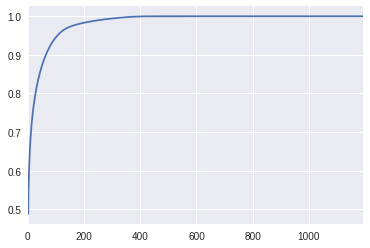

In [95]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(new_X)
pd.Series(pca.explained_variance_ratio_.cumsum(),index=range(1,pca.explained_variance_.size+1)).plot()

##### Let's try to use the first 200 principle components from PCA

In [96]:
pca_X = pca.transform(new_X)[:,:200]

In [97]:
prediction = cross_val_predict(LinearRegression(),pca_X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Linear Regression:',r2_score(y_true=y,y_pred=prediction))

('Linear Regression:', 0.78750370316893792)


In [99]:
RidgeCV(alphas=[0.5,1,2,4,8,16,32]).fit(pca_X,y).alpha_

8.0

In [100]:
RidgeCV(alphas=np.array(range(50,150,5),dtype=float)/10).fit(pca_X,y).alpha_

9.0

In [101]:
prediction = cross_val_predict(Ridge(alpha=9,max_iter=100000),pca_X,y,
                cv=KFold(10,shuffle=True,random_state=666))
print('Ridge Regression:',r2_score(y_true=y,y_pred=prediction))

('Ridge Regression:', 0.78896065139501181)


##### 200 principle components provided acceptable results

## So far we did quite good on predicting average prices. Let's move to the price ranges.

#### Intuitively, we think within the same bedrooms and bathroom numbers, apartment size directly effects rental price. Let's take a look of the ranges at first. 

Points on the red line represents apartments in the same building, 
with the same number of bedrooms/bathrooms, 
and having no difference on their sizes


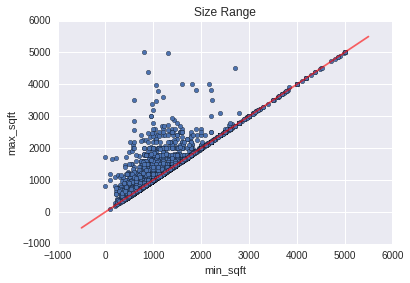

In [89]:
no_na.plot.scatter('min_sqft','max_sqft')
plt.plot([-500,5500],[-500,5500],color='red',alpha=0.6)
_ = plt.title('Size Range')
print('''Points on the red line represents apartments in the same building, \nwith the same number of bedrooms/bathrooms, \nand having no difference on their sizes''')

There are 5538 out of 7111 apartments having the same room size.
However, 1567 of them have different prices.


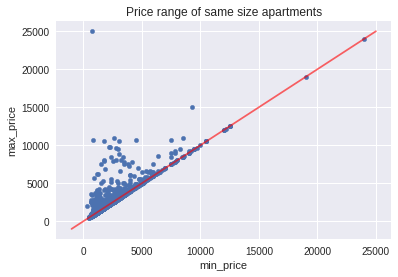

In [119]:
same_size = no_na[no_na.max_sqft == no_na.min_sqft]
print('There are {0} out of {1} apartments having the same room size.'.format(same_size.shape[0],no_na.shape[0]))
print('However, {0} of them have different prices.'.format(same_size[same_size.min_price!=same_size.max_price].shape[0]))
same_size.plot.scatter('min_price','max_price',title='Price range of same size apartments')
_ = plt.plot([-1000,25000],[-1000,25000],color='red',alpha=0.6)

##### So, here we have a difficult problem. Assuming that there are two studios in a same building. They are in the same location, they have the same size of room area, they provide same amenities. However they are in different prices. To solve this problem, we need more features such as apartment floors, their views and etc., since these features may impact rental prices.

#### For those apartments with different sizes and different prices, we can find out some linear relationships between two ranges.

In [29]:
different_size = no_na[no_na.max_sqft != no_na.min_sqft].copy()

Different colors represent different bedroom numbers


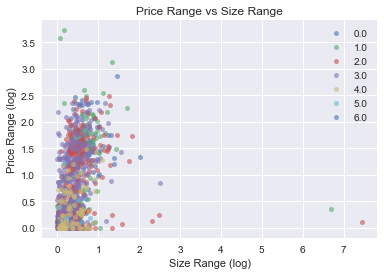

In [30]:
different_size.loc[:,'price_range'] = np.log(different_size.max_price) - np.log(different_size.min_price)
different_size.loc[:,'size_range'] = np.log(different_size.max_sqft) - np.log(different_size.min_sqft)
groups = different_size.groupby('bed')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.size_range, group.price_range, marker='o', linestyle='', ms=5,
            label=name, alpha=0.6)
plt.legend()
plt.xlabel('Size Range (log)')
plt.ylabel('Price Range (log)')
_ = plt.title('Price Range vs Size Range')
print('Different colors represent different bedroom numbers')

### Next, let's use the model fitted on avg_price to predict max_price and min_price.

In [113]:
no_na['log_max_sqft'] = np.log(no_na.max_sqft)
no_na['log_min_sqft'] = np.log(no_na.min_sqft)

In [114]:
feature_to_fit_max = ['bed',
 'bath',
 'log_max_sqft',
 'rooms',
 'walkscore',
 'num_features',
 'num_unit_features',
 'num_building_features',
 'num_neighborhood_features',
 'manhattan_dist',
 'euclidean_dist',
 'lat',
 'lon']
feature_to_fit_min = ['bed',
 'bath',
 'log_min_sqft',
 'rooms',
 'walkscore',
 'num_features',
 'num_unit_features',
 'num_building_features',
 'num_neighborhood_features',
 'manhattan_dist',
 'euclidean_dist',
 'lat',
 'lon']

In [105]:
poly_features = poly.fit_transform(MinMaxScaler().fit_transform(no_na[feature_to_fit_max+['dist_to_loop','dist_to_ML']]))
new_X_max = np.hstack([poly_features,
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct])
y_max = np.log(no_na.max_price)

In [115]:
poly_features = poly.fit_transform(MinMaxScaler().fit_transform(no_na[feature_to_fit_min+['dist_to_loop','dist_to_ML']]))
new_X_min = np.hstack([poly_features,
                   pd.get_dummies(no_na[['fips','property_indicator_id']].astype(str)),
                   amenity_dummy,zip_code,ct])
y_min = np.log(no_na.min_price)

#### The prediction on max_price is acceptable

In [111]:
prediction = np.array([],dtype=float)
test_index = np.array([],dtype=int)
for train, test in KFold(10,shuffle=True,random_state=666).split(new_X,y):
    test_index = np.append(test_index,test)
    reg = Ridge(alpha=0.0026,max_iter=10000)
    reg.fit(new_X[train],np.array(y)[train])
    prediction = np.append(prediction,reg.predict(new_X_max[test]))
inverted_index = np.zeros(y.size,dtype=int)
inverted_index[test_index] = np.arange(y.size,dtype=int)
prediction = prediction[inverted_index]
print('Ridge prediction on max price',r2_score(y_true=y_max,y_pred=prediction))

('Ridge prediction on max price', 0.72455367175824936)


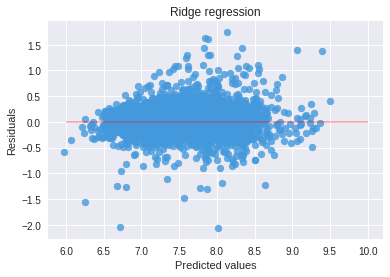

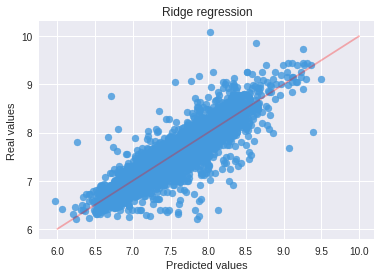

In [112]:
plt.scatter(prediction,prediction-y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 6, xmax = 10, color = "red",alpha=0.3)
plt.show()

plt.scatter(prediction,y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([6, 10], [6, 10], c = "red",alpha=0.3)

#### The prediction on min_price is worse. From the residual plots, we can find out that most of the min_price are over estimated. The model thinks these apartments should have a higher price.

In [118]:
prediction = np.array([],dtype=float)
test_index = np.array([],dtype=int)
for train, test in KFold(10,shuffle=True,random_state=666).split(new_X,y):
    test_index = np.append(test_index,test)
    reg = Ridge(alpha=0.0026,max_iter=10000)
    reg.fit(new_X[train],np.array(y)[train])
    prediction = np.append(prediction,reg.predict(new_X_min[test]))
inverted_index = np.zeros(y.size,dtype=int)
inverted_index[test_index] = np.arange(y.size,dtype=int)
prediction = prediction[inverted_index]
print('Ridge prediction on min price',r2_score(y_true=y_min,y_pred=prediction))

('Ridge prediction on min price', -0.019812229365021361)


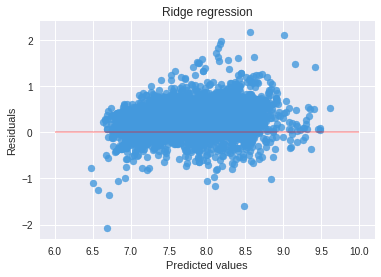

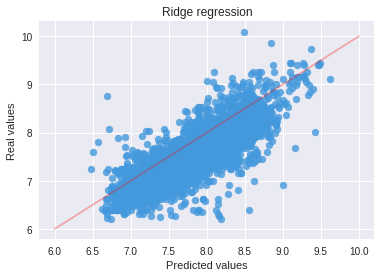

In [117]:
plt.scatter(prediction,prediction-y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 6, xmax = 10, color = "red",alpha=0.3)
plt.show()

plt.scatter(prediction,y,alpha=0.8,color='#4499dd')
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([6, 10], [6, 10], c = "red",alpha=0.3)

### These are what I have done so far. Remember the model was applied on samples without missing values and zeros on price or sqft. Therefore, the next step should be finding the best way to filling the missing values. Potential methods include filling with mean values, mode values, median values from different groups, such as room types and areas. Applying K Nearest Neighbors to fill missing values is possible as well.

### Further feature engineering is also important. For example, we left more than 500 census_tract out. There must be some information behind them. In addition, landlords may reduce the price if an apartment is vacant for a long time. We need to collect such period information as well.

### For linear models, processing outliers is significant. We may remove them before buidling models. But in real estate industry, some luxury properties always provide extremely prices, which might be regarded as outliers. We could separate those luxury properties out from others and build additional models for them.

### At last, to get rid of outliers' effects and improve prediction performance, no-linear models like kernel based models and tree base models could be used. (I tried RBF SVM and Random Forest, they both got more than 0.8 of r2 scores on 10-fold cross validation with the basic 13 numeric features). Ensembling and stacking might be applied as well.

# Thanks